<a href="https://colab.research.google.com/github/princil1a/Princilia/blob/main/Apriori_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b>Market Basket Analysis with Apriori Algorithm  </b></div>


Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import networkx as nx

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Groceries data.csv')
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [ ]:
#Returns the number of rows and columns in the dataset.
df.shape


(38765, 7)

 Data Exploration and Preprocessing

In [ ]:
df.Member_number.nunique()

3898

In [ ]:
df.itemDescription.nunique()

167

In [ ]:
df.Date.nunique()

728

In [ ]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)

,0
Member_number,0
Date,0
itemDescription,0
year,0
month,0
day,0
day_of_week,0


In [ ]:
# Most frequently purchased items
df["itemDescription"].value_counts().head(10)

,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


In [ ]:
# Creating a basket format dataset where each row represents a member's purchases

basket = (df.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))

In [ ]:
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
# Encoding purchase values (1 = purchased, 0 = not purchased)
def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.map(encode_units)
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


 Implementing Apriori Algorithm

In [ ]:

# trying out on a sample item
whole_milk_df = basket.loc[basket['whole milk']==1]
# Using apriori algorithm, creating association rules for the sample item

# Applying apriori algorithm for whole_milk_df
frequent_itemsets = apriori(whole_milk_df, min_support=0.15, use_colnames=True)
# Storing the association rules into rules
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
selected_columns = [
    'antecedents', 'consequents', 'antecedent support', 'consequent support', 'support',
    'confidence', 'lift']
# Sorting the rules on lift and support
whole_milk_rules[selected_columns].sort_values(['lift','support'],ascending=False).reset_index(drop=True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991
1,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991
2,(yogurt),"(whole milk, other vegetables)",0.328667,0.417693,0.156775,0.477002,1.141991
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991
4,"(whole milk, other vegetables)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991
5,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991
6,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736
7,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736
8,"(whole milk, other vegetables)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736
9,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736


 Finding Items Frequently Bought Together


In [ ]:
def frequently_bought_together(item):

    # df of item passed
    item_df = basket.loc[basket[item]==1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [ ]:
# Example 1
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'bottled beer'}), frozenset({'salty snack'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [ ]:
# Example 2
frequently_bought_together('ice cream')

Items frequently bought together with ice cream


array([frozenset({'beef'}), frozenset({'ice cream'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [ ]:
# Example 3
frequently_bought_together('chewing gum')

Items frequently bought together with chewing gum


array([frozenset({'beef'}), frozenset({'chewing gum'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'whole milk'}), frozenset({'butter'})], dtype=object)

Visualizing Association Rules

In [ ]:
def visualize_rules(item, no_of_rules, basket):
    # df of item passed
    item_df = basket.loc[basket[item] == 1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    print(rules['consequents'].head(6).tolist())

    support = rules.support.values
    confidence = rules.confidence.values



    # Creating a new digraph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    cmap = plt.get_cmap("viridis", no_of_rules)  # Choose a colormap
    colors = [cmap(i) for i in range(no_of_rules)]

    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    # adding as many nodes as the number of rules requested by the user
    for i in range(no_of_rules):
        G1.add_node("R"+str(i))

        # adding antecedents to the nodes
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), weight=2)

        # adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, weight=2)

    for node in G1.nodes():
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')

    print('Visualization of Rules')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)

    # Use a colormap for edge colors based on weight
    edge_colors = weights

    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, cmap=plt.cm.viridis,
            width=weights, font_size=16, with_labels=False, edge_cmap=plt.cm.Blues)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

Items frequently bought together with yogurt
[frozenset({'whole milk'}), frozenset({'other vegetables'}), frozenset({'whole milk'}), frozenset({'other vegetables'}), frozenset({'yogurt', 'whole milk'}), frozenset({'yogurt', 'other vegetables'})]
Visualization of Rules


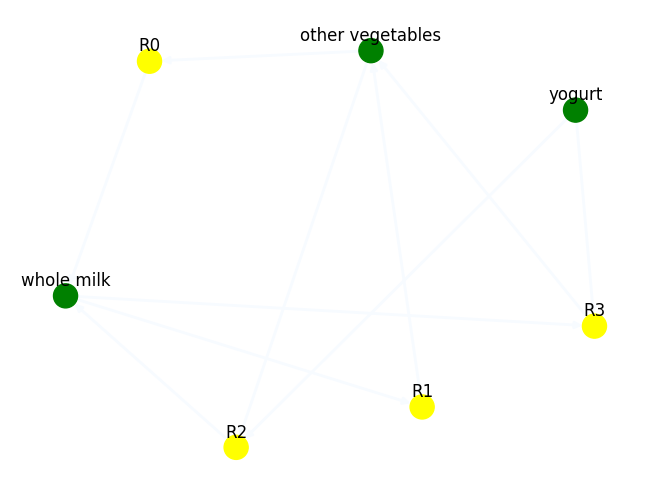

In [ ]:
visualize_rules('yogurt',4,basket)

Interactive Filtering for Association Rules

In [ ]:
from IPython.display import clear_output

import ipywidgets as widgets

# Preparing Basket Format
basket = df.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().reset_index().fillna(0)
basket.set_index('Member_number', inplace=True)
#1 = Customer bought the item 0 = Customer didn’t buy the item
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


# Applying Apriori Algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


# Selecting only relevant columns
selected_columns = [
    "antecedents", "consequents", "antecedent support",
    "consequent support", "support", "confidence", "lift"
]
rules_filtered = rules[selected_columns]

#Convert Antecedents and Consequents into a readable fromat
rules_filtered["antecedents"] = rules_filtered["antecedents"].apply(lambda x: ', '.join(list(x)))
rules_filtered["consequents"] = rules_filtered["consequents"].apply(lambda x: ', '.join(list(x)))


# Interactive Dropdowns for Filtering Categorical Values
antecedent_dropdown = widgets.Dropdown(
    options=['All'] + sorted(rules_filtered["antecedents"].unique()),
    value='All',
    description='Antecedent:',
    style={'description_width': 'initial'}
)

consequent_dropdown = widgets.Dropdown(
    options=['All'] + sorted(rules_filtered["consequents"].unique()),
    value='All',
    description='Consequent:',
    style={'description_width': 'initial'}
)

search_box = widgets.Text(
    value='',
    placeholder='Search any value...',
    description='Search:',
    style={'description_width': 'initial'}
)

pagination_dropdown = widgets.Dropdown(
    options=[5, 10, 25, 50, 100],
    value=10,
    description='Results per page:',
    style={'description_width': 'initial'}
)

# Filters for Numeric Columns

support_dropdown = widgets.FloatSlider(
    min=0, max=rules_filtered["support"].max(), step=0.01, value=0.01,
    description='Min Support:', style={'description_width': 'initial'}
)

confidence_dropdown = widgets.FloatSlider(
    min=0, max=rules_filtered["confidence"].max(), step=0.01, value=0.1,
    description='Min Confidence:', style={'description_width': 'initial'}
)

lift_dropdown = widgets.FloatSlider(
    min=0, max=rules_filtered["lift"].max(), step=0.1, value=1,
    description='Min Lift:', style={'description_width': 'initial'}
)

# Output Widget to Display the Table
output_table = widgets.Output()

# Function to update table
def update_table(*args):
    with output_table:
        clear_output(wait=True)
        df_filtered = rules_filtered.copy()

        # Apply categorical filters
        if antecedent_dropdown.value != 'All':
            df_filtered = df_filtered[df_filtered['antecedents'] == antecedent_dropdown.value]
#If the user selects a specific consequent, the dataset is filtered to show only rows where the "consequents" column matches the selected value
        if consequent_dropdown.value != 'All':
            df_filtered = df_filtered[df_filtered['consequents'] == consequent_dropdown.value]

#If the user types something in the search box then it will apply a search filter
        if search_box.value:
            df_filtered = df_filtered[df_filtered.apply(lambda row: row.astype(str).str.contains(search_box.value, case=False).any(), axis=1)]

        # Apply numerical filters
        df_filtered = df_filtered[
            (df_filtered["support"] >= support_dropdown.value) &
            (df_filtered["confidence"] >= confidence_dropdown.value) &
            (df_filtered["lift"] >= lift_dropdown.value)
        ]
#Displays the filtered table with a limited number of rows based on pagination_dropdown.value (e.g., 10 rows per page).

        display(df_filtered.head(pagination_dropdown.value))

# Attach Callbacks to Widgets
#The observe() method is used to trigger the update_table function whenever a user changes the value of any widget.
#Each widget calls update_table when modified, ensuring that the table updates dynamically.

antecedent_dropdown.observe(update_table, names='value')
consequent_dropdown.observe(update_table, names='value')
search_box.observe(update_table, names='value')
pagination_dropdown.observe(update_table, names='value')
support_dropdown.observe(update_table, names='value')
confidence_dropdown.observe(update_table, names='value')
lift_dropdown.observe(update_table, names='value')

# Layout for Filters Above the Table
filter_widgets = widgets.VBox([
    widgets.HBox([antecedent_dropdown, consequent_dropdown, search_box, pagination_dropdown]),
    widgets.HBox([support_dropdown, confidence_dropdown, lift_dropdown]),
    output_table
])

# Display Everything
display(filter_widgets)
update_table()
